<a href="https://colab.research.google.com/github/suzzingV/Time-Series-Analysis/blob/main/ch1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

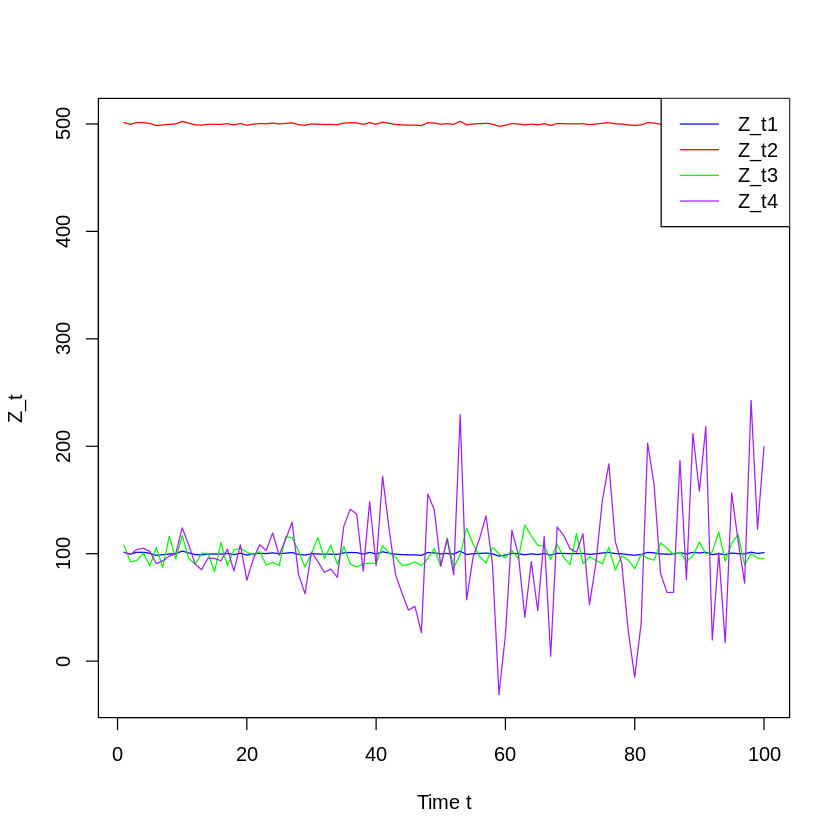

In [1]:
# 1.5
# 시드 설정
set.seed(0)

#시간 설정
t <- 100

e_t <- rnorm(t, mean = 0, sd = 1) # N(0, 1)
e_t_100 <- rnorm(t, mean = 0, sd = 10) #(0, 100)

#시계열 모형 정의
Z_t1 <- 100 + e_t
Z_t2 <- 500 + e_t
Z_t3 <- 100 + e_t_100
Z_t4 <- 100 + (1:t) * e_t

# 모든 시계열 그리기
plot(Z_t1, type = "l", col = "blue", ylim = c(min(c(Z_t1, Z_t2, Z_t3, Z_t4)), max(c(Z_t1, Z_t2, Z_t3, Z_t4))), ylab = "Z_t", xlab = "Time t")
lines(Z_t2, col = "red")
lines(Z_t3, col = "green")
lines(Z_t4, col = "purple")
legend("topright", legend = c("Z_t1", "Z_t2", "Z_t3", "Z_t4"), col = c("blue", "red", "green", "purple"), lty = 1)

In [4]:
# 기술 통계 분석 및 이론적 평균과 분산 비교
summary_stats <- function(Z_t) {
  mean_val <- mean(Z_t)
  var_val <- var(Z_t)
  return(c(mean = mean_val, variance = var_val))
}

descriptive_stats <- list(
  Model1 = summary_stats(Z_t1),
  Model2 = summary_stats(Z_t2),
  Model3 = summary_stats(Z_t3),
  Model4 = summary_stats(Z_t4)
)

print(descriptive_stats)

$Model1
       mean    variance 
100.0226684   0.7790714 

$Model2
       mean    variance 
500.0226684   0.7790714 

$Model3
    mean variance 
99.54448 93.21682 

$Model4
    mean variance 
 101.789 2374.687 



In [5]:
# 1.6
install.packages("ggplot2")
install.packages("reshape2")
library(ggplot2)
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




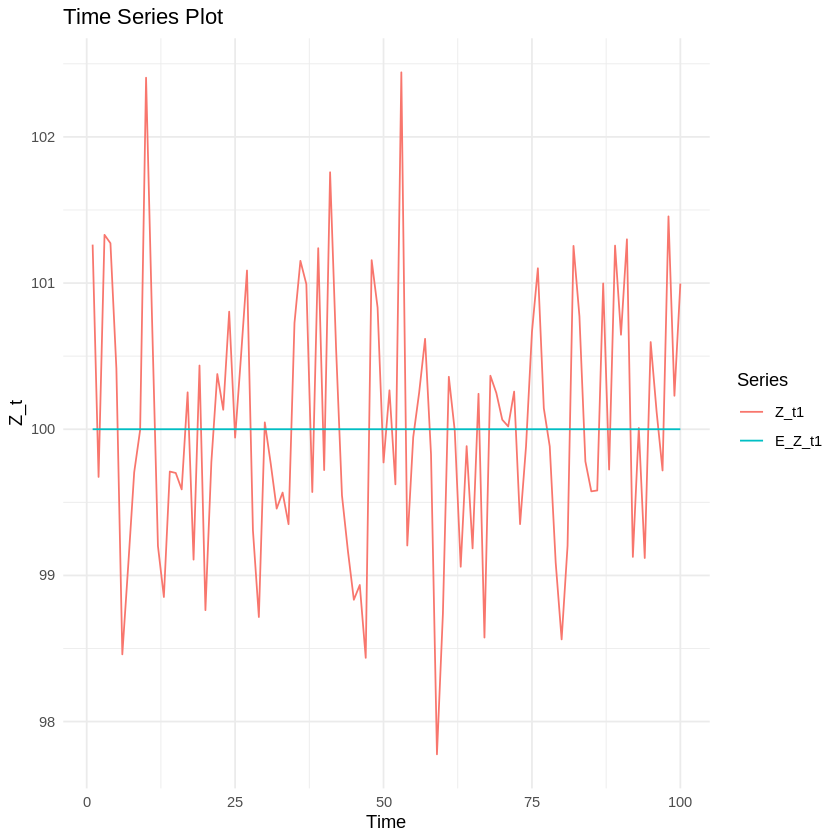

In [7]:
# (1)
# 불규칙 성분
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + e_t
E_Z_t1 <- 100

df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

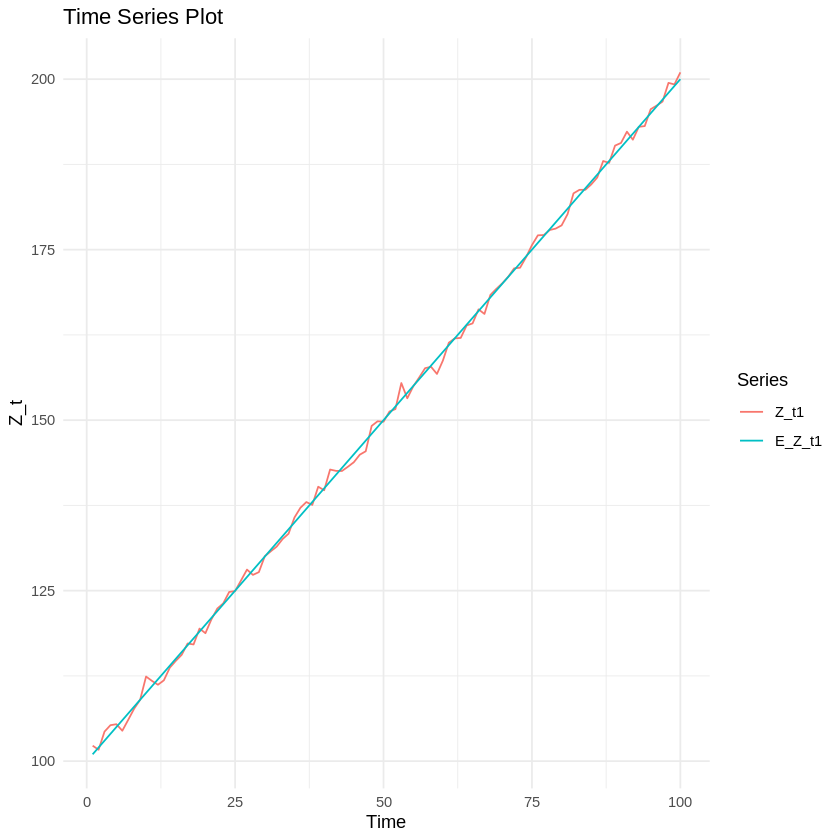

In [8]:
# (2)
# 추세성분 : 선형 추세
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + t + e_t
E_Z_t1 <- 100 + t

df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

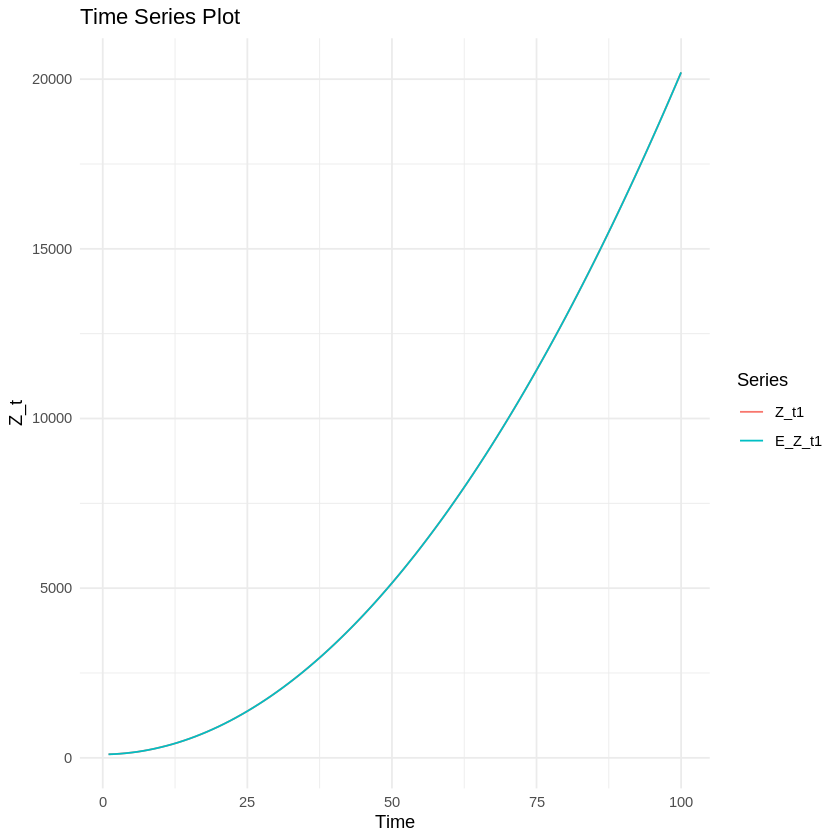

In [12]:
# (3)
# 추세성분 : 비선형 추세
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + t + 2*t^2 + e_t
E_Z_t1 <- 100 + t + 2*t^2

df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

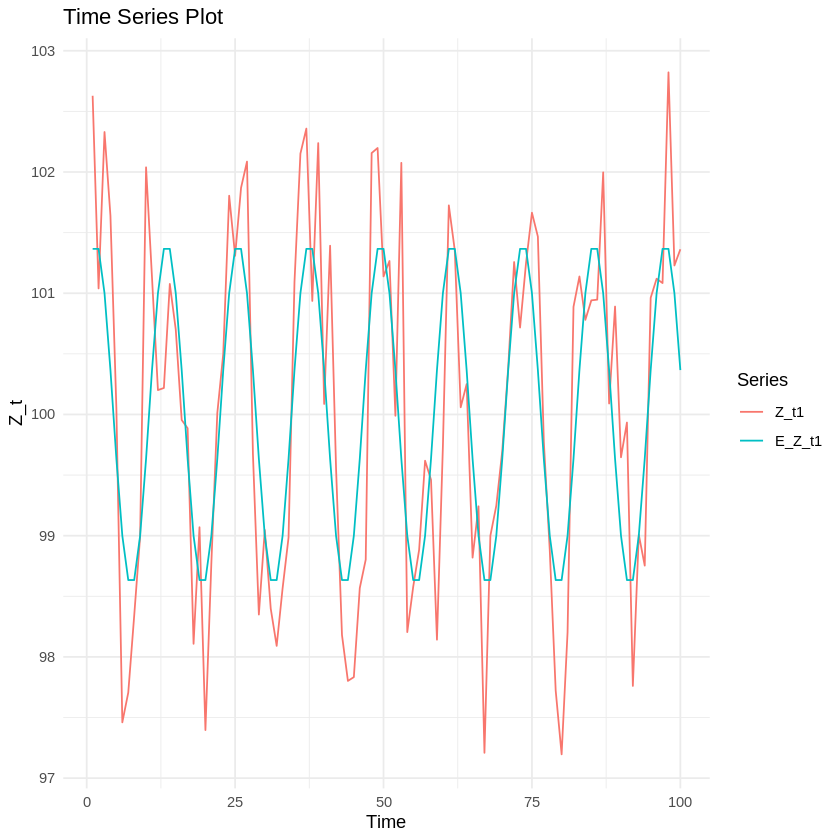

In [13]:
# (4)
# 계절성분 : sin, cos -> 계절적 변동성 부여
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + sin(2*pi*t/12) + cos(2*pi*t/12) + e_t
E_Z_t1 <- 100 + sin(2*pi*t/12) + cos(2*pi*t/12)

df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

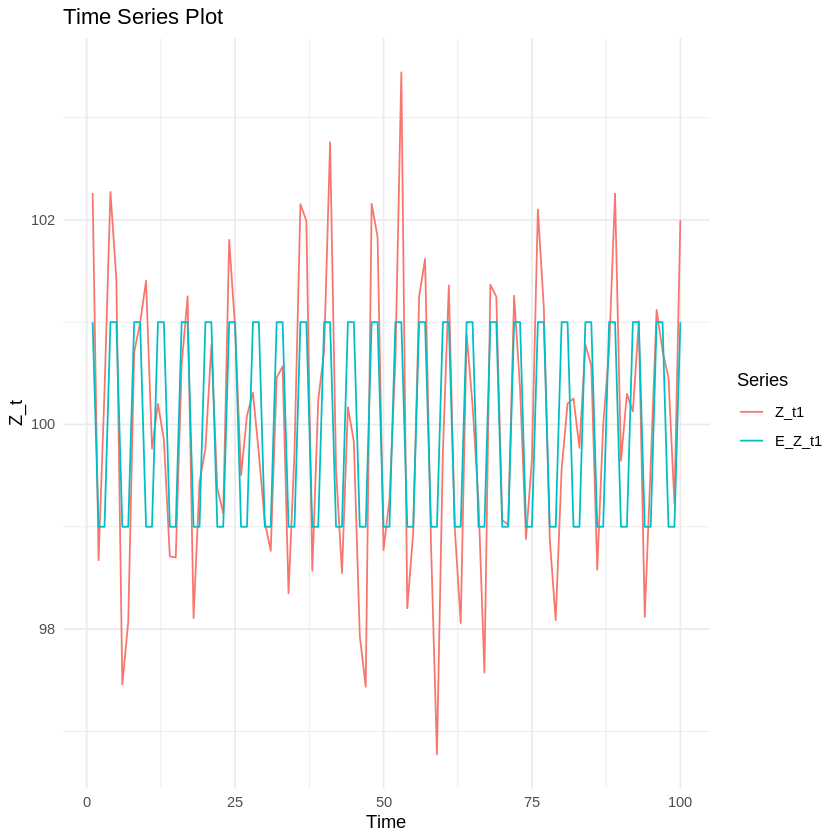

In [14]:
# (5)
# 계절성분 : sin, cos -> 계절적 변동성 부여, t/4 -> 계절적 변동이 1년에 4번 발생
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + sin(2*pi*t/4) + cos(2*pi*t/4) + e_t
E_Z_t1 <- 100 + sin(2*pi*t/4) + cos(2*pi*t/4)

df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

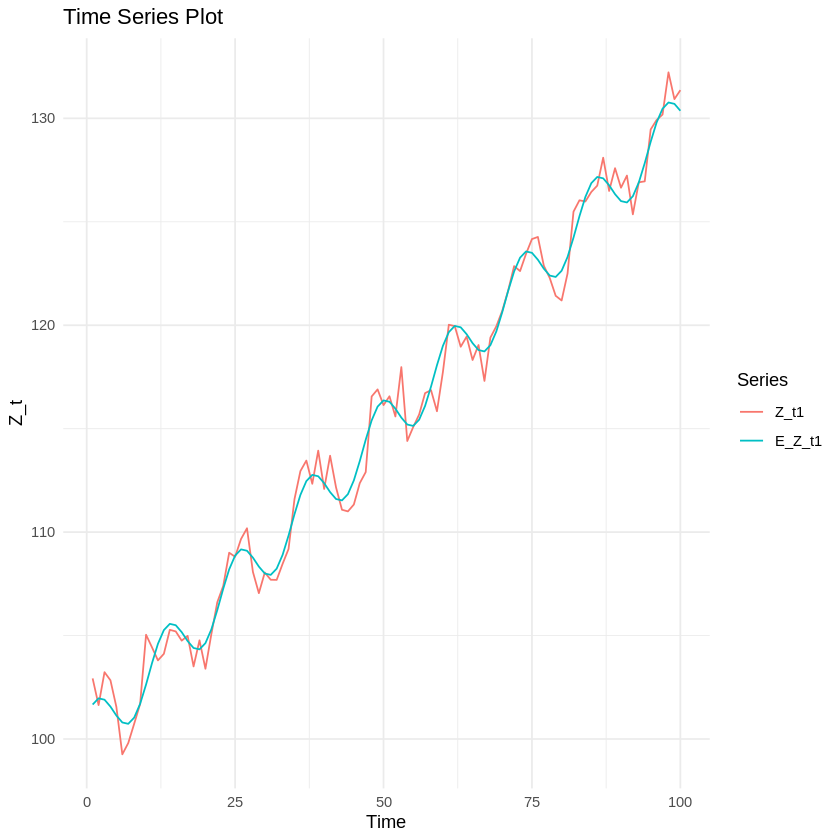

In [15]:
# (6)
# 계절성분 : sin, cos -> 계절적 변동성 부여
# 추세성분 : 100 + 0.3*t -> 선형 추세
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + 0.3*t + sin(2*pi*t/12) + cos(2*pi*t/12) + e_t
E_Z_t1 <- 100 + 0.3*t + sin(2*pi*t/12) + cos(2*pi*t/12)
df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

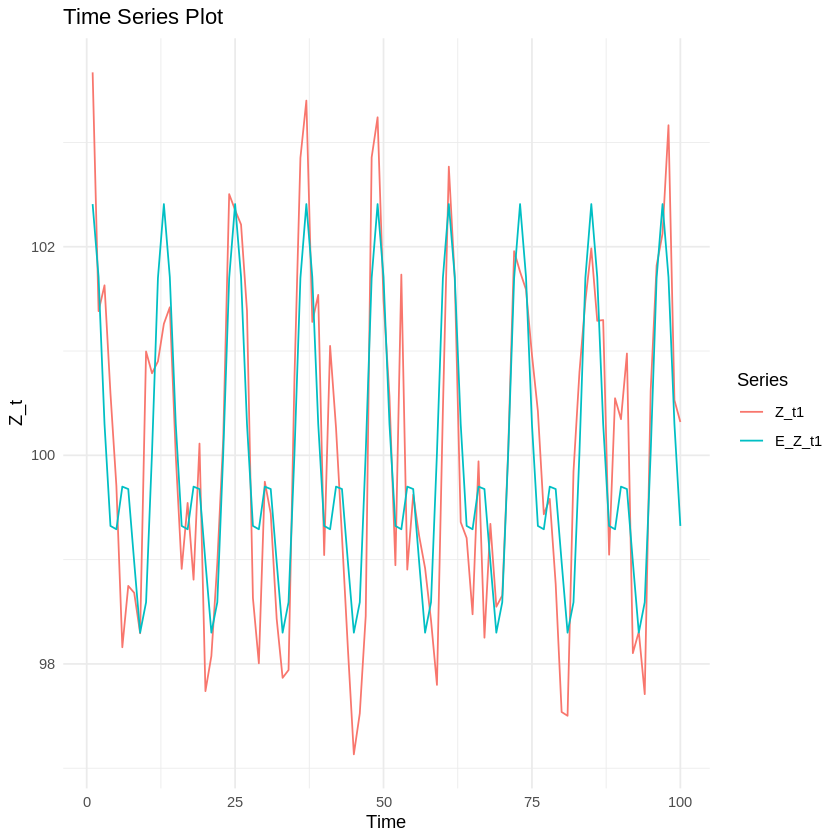

In [16]:
# (7)
# 계절성분 : sin, cos -> 계절적 변동성 부여
# t/12 -> 12개월 주기의 계절적 변동성, 연간 변동성 모델링
# t/6 -> 6개월 주기의 추가적인 계절적 변동성
set.seed(0)

t <- 1:100

e_t <- rnorm(100, mean = 0, sd = 1)

Z_t1 <- 100 + sin(2*pi*t/12) + cos(2*pi*t/12) + 0.8*sin(2*pi*t/6) + 0.7*cos(2*pi*t/6) + e_t
E_Z_t1 <- 100 + sin(2*pi*t/12) + cos(2*pi*t/12) + 0.8*sin(2*pi*t/6) + 0.7*cos(2*pi*t/6)
df <- data.frame(t, Z_t1, E_Z_t1)

df_melted <- melt(df, id.vars = 't')

ggplot(df_melted, aes(x = t, y = value, color = variable)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Time Series Plot", x = "Time", y = "Z_t", color = "Series") +
  theme(legend.position = "right")

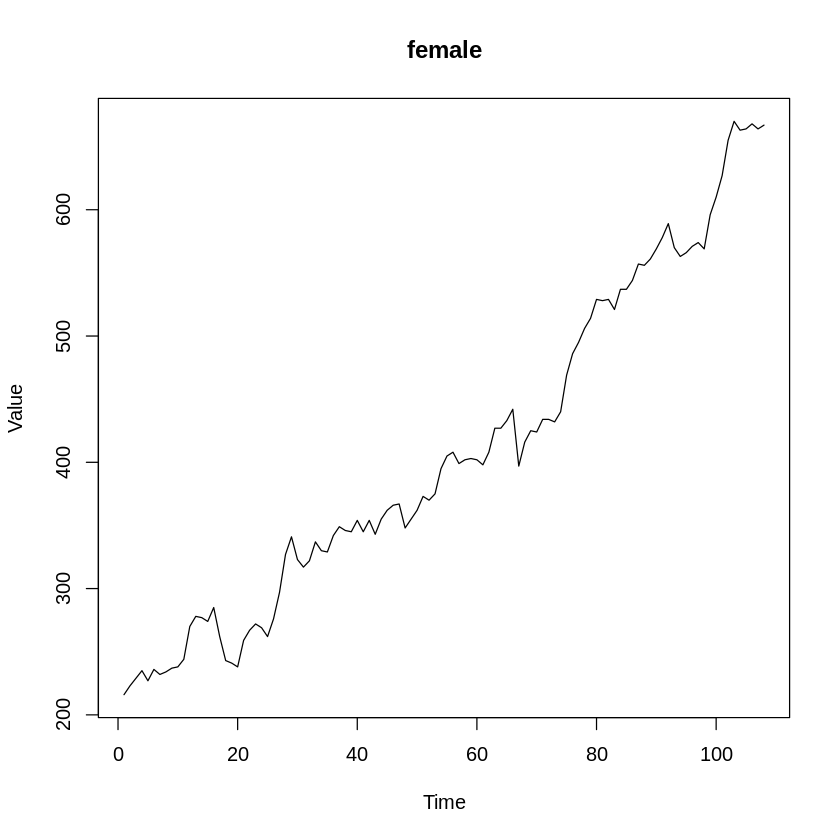

In [20]:
# 1.7
# (1)
# 추세성분: 선형 추세
# 불규칙성분
data <- scan("/content/female.txt")
ts_data <- ts(data)
plot(ts_data, main = "female", ylab = "Value", xlab = "Time")

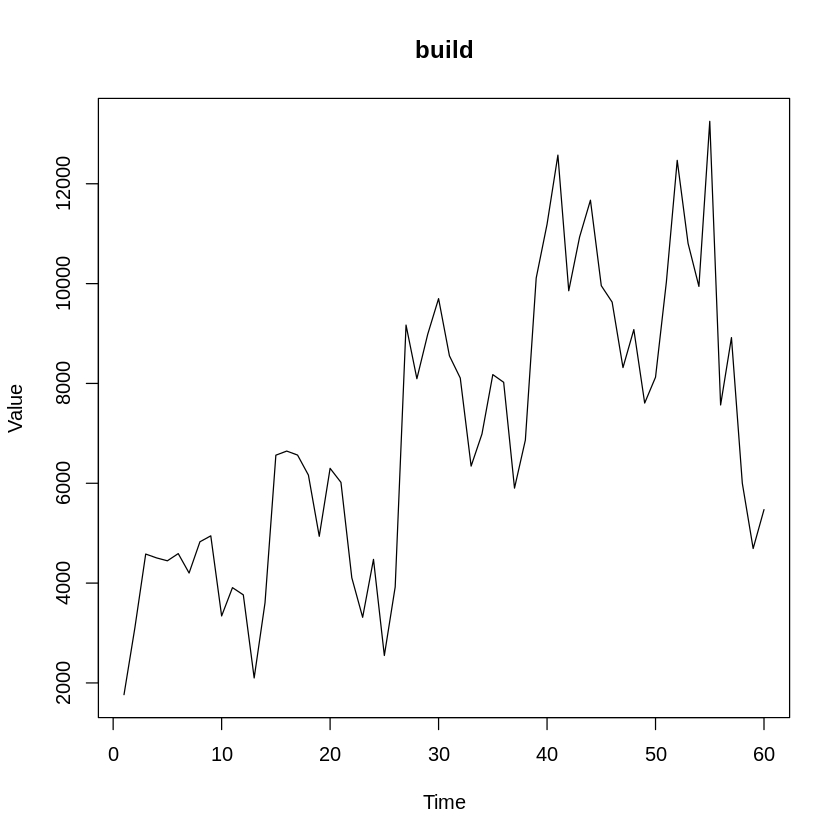

In [21]:
# (2)
# 계절성분, 추세성분, 불규칙성분
data <- scan("/content/build.txt")
ts_data <- ts(data)
plot(ts_data, main = "build", ylab = "Value", xlab = "Time")

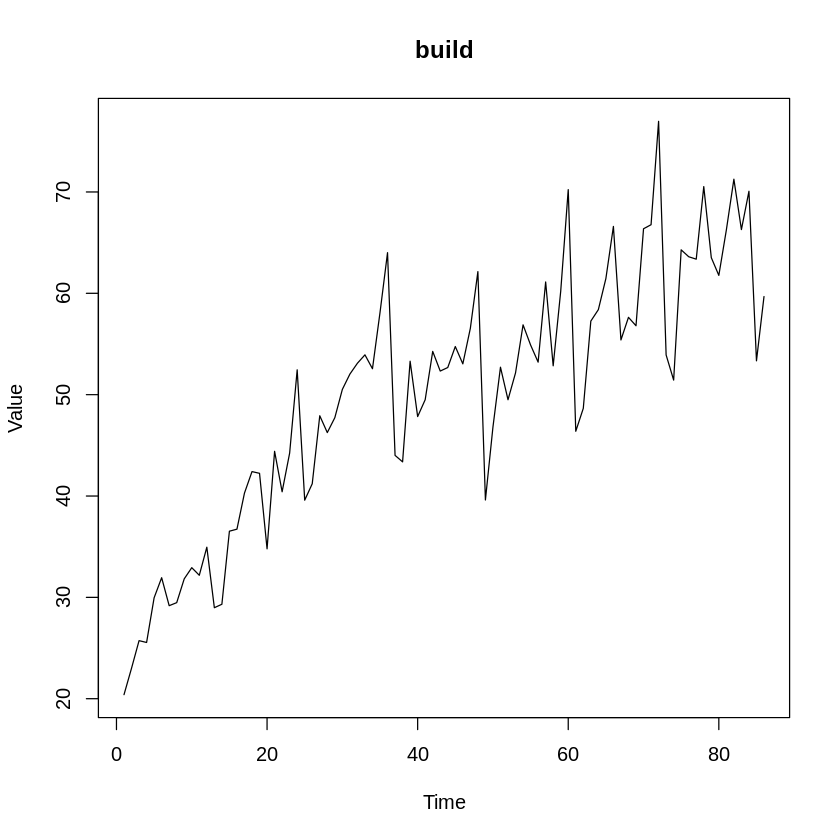

In [22]:
# (3)
# 계절성분, 추세성분, 불규칙성분
data <- scan("/content/export.txt")
ts_data <- ts(data)
plot(ts_data, main = "export", ylab = "Value", xlab = "Time")

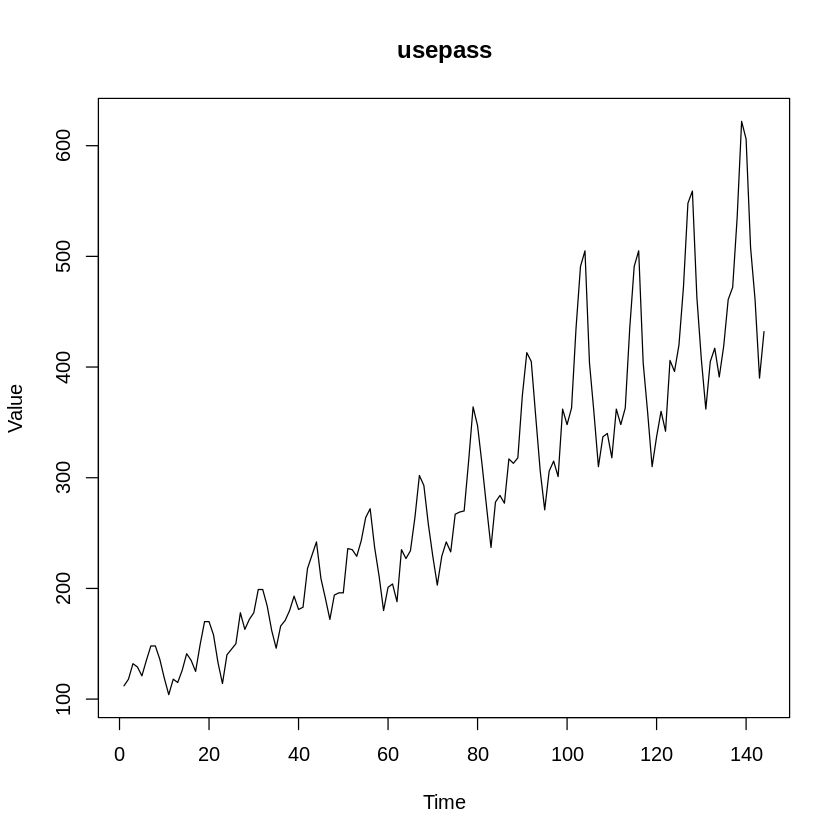

In [24]:
# (4)
# 추세, 계절, 불규칙, 이분산성
data <- scan("/content/usapass.txt")
ts_data <- ts(data)
plot(ts_data, main = "usapass", ylab = "Value", xlab = "Time")